# TRANSFORMING NON-STATIONARY IPL TIME SERIES DATA TO STATIONARY DATA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

# Generate dates for 10 seasons (assuming 60 matches per season)
dates = pd.date_range(start='2010-03-01', periods=600, freq='3D')  # IPL matches every 3 days

# Simulate total runs with an upward trend and seasonality
trend = np.linspace(100, 200, 600)  # Increasing trend from 100 to 200 runs
seasonality = 20 * np.sin(2 * np.pi * dates.dayofyear / 365)  # Yearly seasonality
noise = np.random.normal(0, 10, 600)  # Random noise

# Total runs
total_runs = trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Total_Runs': total_runs})
df.set_index('Date', inplace=True)

# Display the first few rows
df.head()

,Total_Runs
Date,
2010-03-01,122.142421
2010-03-04,116.465652
2010-03-07,124.951051
2010-03-10,134.281967
2010-03-13,117.238174


# 2. Visualizing the Data 

# 2.1 Plotting the Time Series

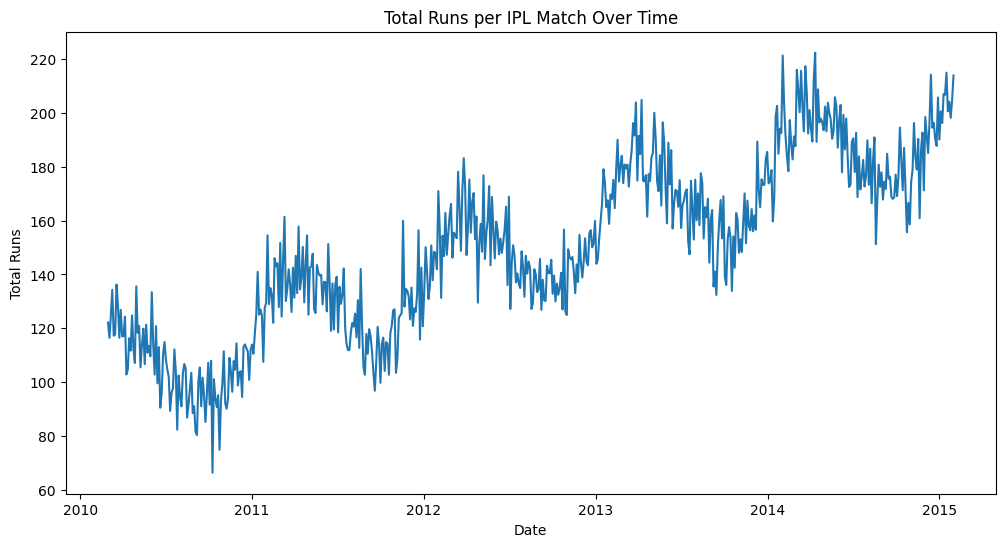

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['Total_Runs'])
plt.title('Total Runs per IPL Match Over Time')
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.show()

# 2.2 Histogram and Density Plot

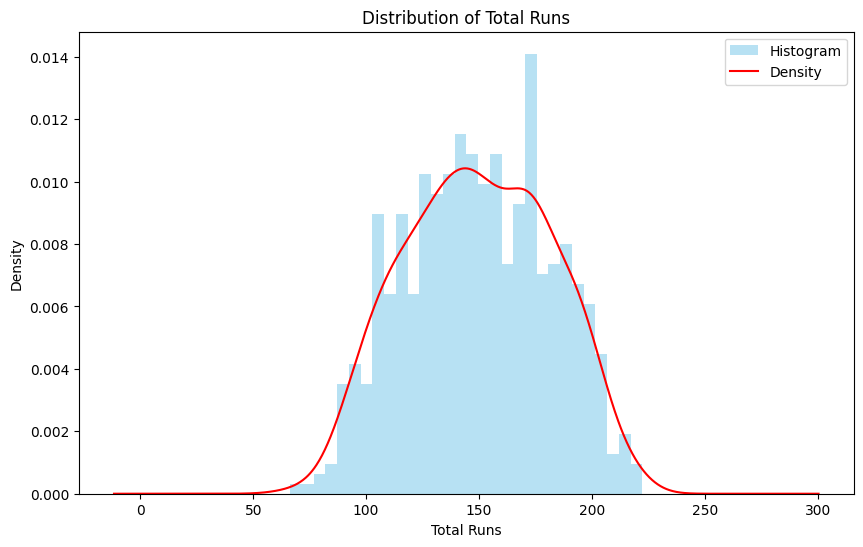

In [22]:
plt.figure(figsize=(10, 6))
df['Total_Runs'].plot(kind='hist', bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')
df['Total_Runs'].plot(kind='kde', color='red', label='Density')
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.legend()
plt.show()

# 3. Preprocessing the Data <a id="3"></a>

# 3.1 Handling Missing Values

Since we generated the data, there are no missing values. In real datasets, you would check for and handle missing data appropriately.

# 3.2 Outlier Detection

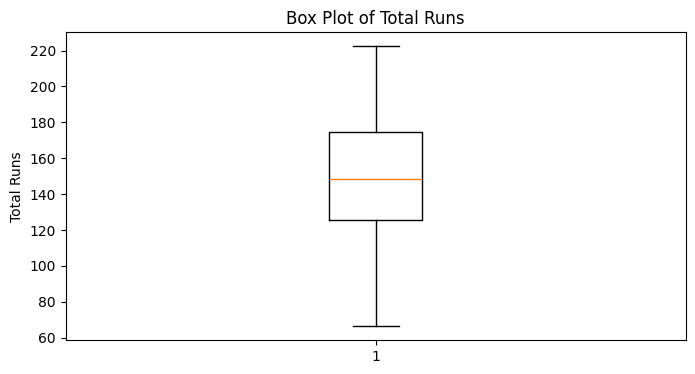

In [23]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Total_Runs'])
plt.title('Box Plot of Total Runs')
plt.ylabel('Total Runs')
plt.show()

## 3.3 Feature Engineering

### Lag Features

In [24]:
df['Lag_1'] = df['Total_Runs'].shift(1)
df['Lag_2'] = df['Total_Runs'].shift(2)

### Time-based features

In [25]:
df['Month'] = df.index.month
df['Year'] = df.index.year

## 4. Stationarity Check

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Total_Runs'].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

## 5. Making the Data Stationary 

### 5.1 Differencing

#### First Order Differencing

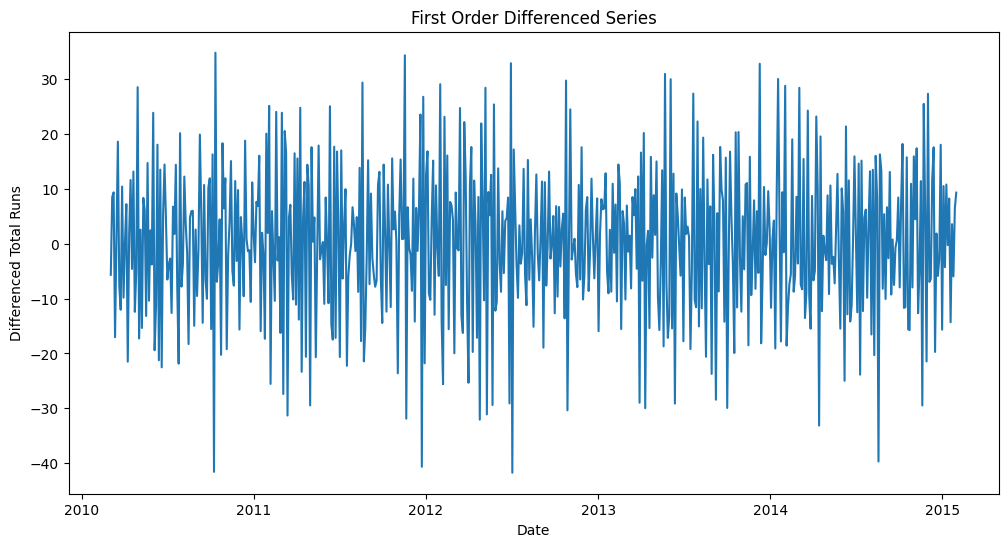

In [26]:
df['Diff_1'] = df['Total_Runs'] - df['Total_Runs'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Diff_1'])
plt.title('First Order Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Total Runs')
plt.show()

### 5.2 Log Transformation

#### Apply Log Transformation

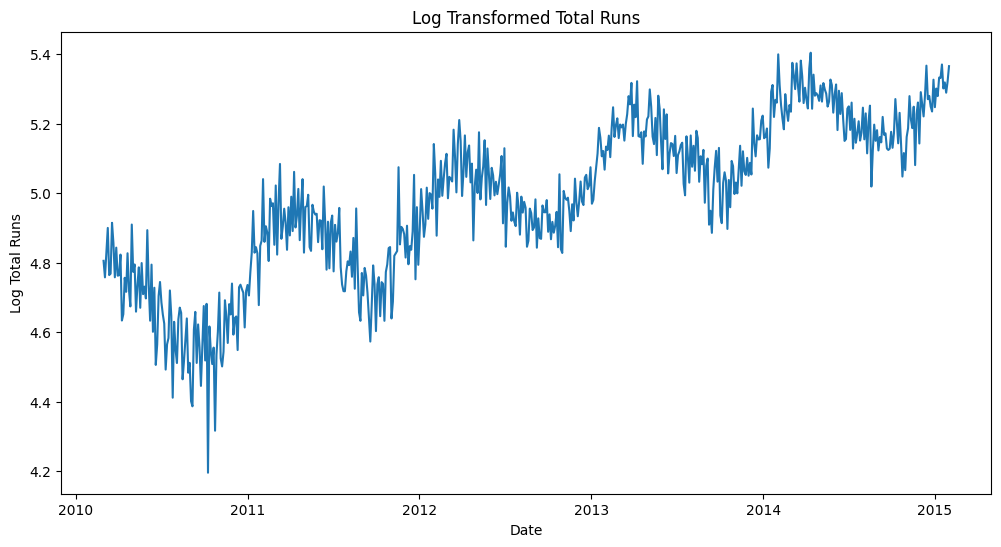

In [27]:
df['Log_Total_Runs'] = np.log(df['Total_Runs'])

plt.figure(figsize=(12, 6))
plt.plot(df['Log_Total_Runs'])
plt.title('Log Transformed Total Runs')
plt.xlabel('Date')
plt.ylabel('Log Total Runs')
plt.show()

### Differencing the Log Transformed Data

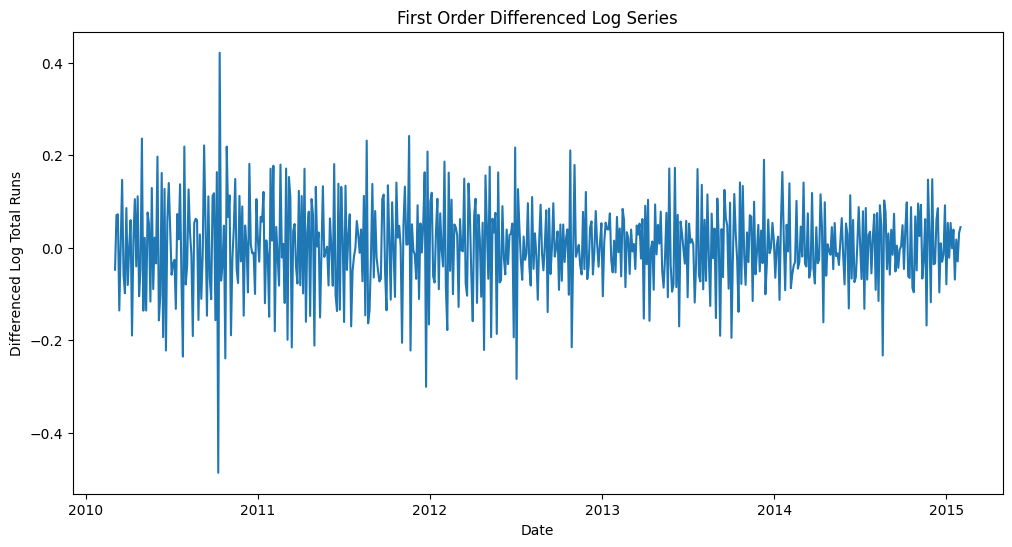

In [28]:
df['Log_Diff_1'] = df['Log_Total_Runs'] - df['Log_Total_Runs'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Log_Diff_1'])
plt.title('First Order Differenced Log Series')
plt.xlabel('Date')
plt.ylabel('Differenced Log Total Runs')
plt.show()

## 6. Observations and Interpretations <a id="6"></a>

### 6.1 Understanding the Tests

- **ADF Test**:
  - **Null Hypothesis (H0)**: The time series is non-stationary.
  - **If p-value < 0.05**: Reject H0; the series is stationary.
- **KPSS Test**:
  - **Null Hypothesis (H0)**: The time series is stationary.
  - **If p-value < 0.05**: Reject H0; the series is non-stationary.
- **Using Both Tests**:
  - Confirms stationarity status from two perspectives.

### 6.2 Importance of Stationarity

- **Stationarity** is crucial for time series forecasting models.
- Non-stationary data can lead to unreliable results.
- Transforming data to be stationary ensures model assumptions are met.

## 7. Conclusion <a id="7"></a>

We have successfully:

- Generated a synthetic IPL dataset representing total runs per match over time.
- Visualized the data, revealing an upward trend and seasonality.
- Performed stationarity checks using ACF, PACF plots, and statistical tests (ADF, KPSS).
- Interpreted the results, confirming the data is non-stationary.
- Applied transformations (differencing, log transformation) to make the data stationary.
- Re-evaluated stationarity, confirming the effectiveness of the transformations.
- With the stationary data, you can proceed to:

- **Model Selection**: Choose appropriate time series models like ARIMA, SARIMA, or advanced models like LSTM.
- **Model Training**: Train the model using the transformed data.
- **Forecasting**: Generate forecasts and validate model performance.